# HW4 due 5p Fri Nov 12 2021

You are welcome (and encouraged) to work with others, but each individual must submit their own writeup.

You are welcome to use analytical and numerical computational tools; if you do, include the **commented** sourcecode in your submission (e.g. the .ipynb file).

You are welcome to consult websites, textbooks, and other materials; if you do, include a full citation in your writeup (e.g. the .ipynb file).

**Important:** before you do any work in the Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.


# 0. [Nakseung Choi]; [He/Him/His]

a. Approximately how many hours did you spend on this assignment?
   
   10 Hours

b. Were there specific problems that took much longer than others?
   
   2e

c. What class meeting(s) did you participate in this week?
   
   Mon & Weds

d. What timezone(s) were you working in this week?
   
   Anytime I could

In [2]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [3]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# render animation
mpl.rc('animation',html='html5')
# animation
from matplotlib import animation as ani
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

In [4]:
# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

In [5]:
# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

Colaboratory Notebook


In [6]:
# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install control
  !pip install JSAnimation
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')
    

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

     |████████████████████████████████| 339 kB 5.1 MB/s 
  Created wheel for control: filename=control-0.9.0-py2.py3-none-any.whl size=344928 sha256=8dfd487f861add18e762d5cc0bde74528f0d7c6f8aeed297c40eb87dda1ce378
  Stored in directory: /root/.cache/pip/wheels/5b/64/54/70faad181d7baff1184541ca00c9a2efa633acd0a811831d30
Successfully built control
  Created wheel for JSAnimation: filename=JSAnimation-0.1-py3-none-any.whl size=11425 sha256=6dbf917258723cafa10f9b4e0ab24766bd9088a3e7b4e2a47e053ddf52cade96
  Stored in directory: /root/.cache/pip/wheels/0e/4e/3d/05fb8cca2646ee0bbfbce17c40a970f48d5e0698b9e5aaa91f
Successfully built JSAnimation


# 1. step response of a linear system

Consider the scalar DE
$$T \dot{y} + y = u.$$

**Assume the input is constant ($u(t) = u_0$).**

a. Express $y(t)$ in terms of $t$, $T$, $y(0)$, $u_0$.

$$\dot{y}+\frac{1}{T}y=\frac{1}{T}u.$$

$$y(t)=C_1e^{-\frac{1}{T}t}+u_0$$

$$y(0)=C_1e^{-\frac{1}{T}0}+u_0$$

$$C_1=y(0)-u_(0)$$

$$y(t)=(y(0)-u_0)e^{-\frac{1}{T}t}+u_0$$


b. Show that the *steady-state value* equals the constant input: $y_{ss} = u_0$.   

$y(t)=(y(0)-u_0)e^{-\frac{1}{T}t}+u_0$

When t$\rightarrow \infty, e^{-\frac{1}{T}t} \rightarrow 0$

$y_{ss}=lim_{t\rightarrow \infty} y(t)=(y(0)-u_0)*0+u_0=u_0$

**Now assume the initial condition is zero, $y(0) = 0$; in this case the output is termed the *step response*.**

c. Show that the *rise time* of the step response (i.e. the time required for the output to go from $10\%$ to $90\%$ of its steady-state value) is approximately $2T$.

$y(0)=0$
$$y(t)=u_0-u_0e^{-\frac{1}{T}t}=u_0(1-e^{-\frac{1}{T}t})$$

When output is 90%,

$$y(t)=0.9u_0 \rightarrow u_0(1-e^{-\frac{1}{T}t})=0.9u_0$$

$$e^{-\frac{1}{T}t}=0.1$$

$$-\frac{t}{T}=ln(0.1)=-2.3026$$

$$t = 2.3026T$$

When output is 10%,

$$y(t)=0.1u_0 \rightarrow u_0(1-e^{-\frac{1}{T}t})=0.1u_0$$

$$e^{-\frac{1}{T}t}=0.9$$

$$-\frac{t}{T}=ln(0.9)=-0.1054$$

$$t = 0.1054T$$

**Therefore, Risetime $t_r=2.3026T-0.1054T=2.2T \approx2T$**


d. Show that the *settling time* of the step response (i.e. the time required for the output to reach and stay within $2\%$ of its steady-state value) is approximately $4T$.

$$y(t_s)=0.98u_0$$

$$u_0(1-e^{-\frac{1}{T}t})=0.98u_0$$

$$e^{-\frac{1}{T}t}=1-0.98=0.02$$

$$t_s=-Tln(0.02)=3.912$$

$$t_s \approx 4T$$


***Takeaway:*** *the approximations you established in (c.) and (d.) show what the ***time constant*** parameter $T$ tells us about the step response of a first-order system.*

# 2. matrix exponential

(a.) Show that matrix multiplication does not generally *commute*, i.e. find $A,B\in\mathbb{R}^{n\times n}$ for which $A\,B \neq B\,A$.  (*Hint:  you should be able to find an example when $n = 2$.*)

$$A=\left[\begin{matrix} a && b \\ c && d \end{matrix}\right]B=\left[\begin{matrix} e && f \\ g && h \end{matrix}\right]$$


$$AB=\left[\begin{matrix} a && b \\ c && d \end{matrix}\right]  \left[\begin{matrix} e && f \\ g && h \end{matrix}\right]=\left[\begin{matrix} ae+bg && af+bh \\ ce+dg && cf+dh \end{matrix}\right]$$


$$BA=\left[\begin{matrix} e && f \\ g && h \end{matrix}\right]  \left[\begin{matrix} a && b \\ c && d \end{matrix}\right]=\left[\begin{matrix} ea+fc && eb+fd \\ ga+hc && gb+hd \end{matrix}\right]$$

$$\therefore AB \neq BA$$

$$A=\left[\begin{matrix} 1 && 2 \\ 3 && 4 \end{matrix}\right]B=\left[\begin{matrix} 5 && 6 \\ 7 && 8 \end{matrix}\right]$$


$$AB=\left[\begin{matrix} 1 && 2 \\ 3 && 4 \end{matrix}\right]  \left[\begin{matrix} 5 && 6 \\ 7 && 8 \end{matrix}\right]=\left[\begin{matrix} 19 && 22 \\ 43 && 52 \end{matrix}\right]$$


$$BA=\left[\begin{matrix} 5 && 6 \\ 7 && 8 \end{matrix}\right]  \left[\begin{matrix} 1 && 2 \\ 3 && 4 \end{matrix}\right]=\left[\begin{matrix} 23 && 34 \\ 31 && 46 \end{matrix}\right]$$

**Now recall the definition of the *matrix exponential*:**

$$ \forall A \in \mathbb{R}^{n\times n} : e^A = \sum_{k=0}^\infty \frac{1}{k!} A^k. $$

**In the remainder of this problem, you'll use this definition directly to establish useful facts.**

(b.) Show that every square matrix commutes with its matrix exponential, i.e. $A\, e^A = e^AA$ for all $A\in\mathbb{R}^{n\times n}$.

$$Ae^A=A\sum_{k=0}^\infty \frac{1}{k!} A^k=A(I+A+\frac{A^2}{2!}+\frac{A^3}{3!}+\frac{A^4}{4!}\cdotp \cdotp \cdotp)$$

$$Ae^A=I+A^2+\frac{A^3}{2!}+\frac{A^4}{3!}+\frac{A^5}{4!}\cdotp \cdotp \cdotp$$

$$Ae^A=A(I+A+\frac{A^2}{2!}+\frac{A^3}{3!}+\frac{A^4}{4!}\cdotp \cdotp \cdotp)$$

$$Ae^A=(\sum_{k=0}^\infty \frac{1}{k!}A^k)A =e^AA$$

(c.) Given an invertible matrix $T\in\mathbb{R}^{n\times n}$, show that $e^{T A T^{-1}} = T e^A T^{-1}$.

$$e^{TAT^{-1}}=\sum_{k=0}^\infty \frac{1}{k!}A^k=I+TAT^{-1}+\frac{(TAT^{-1})^2}{2!}+\frac{(TAT^{-1})^3}{3!}+\frac{(TAT^{-1})^4}{4!} \cdotp \cdotp \cdotp $$

$$(TAT^{-1})^2=ATATT^{-1}T^{-1}=ATAT^{-1}=TA^{2}T^{-1}$$

$$(TAT^{-1})^3=ATATATT^{-1}T^{-1}T^{-1}=ATAT^{-1}=TA^{3}T^{-1}$$

$$e^{TAT^{-1}}=TT^{-1}+TAT^{-1}+\frac{TA^{2}T^{-1}}{2!}+\frac{TA^{3}T^{-1}}{3!}+\frac{TA^{4}T^{-1}}{4!} \cdotp \cdotp \cdotp$$

$$e^{TAT^{-1}}=T(1+A+\frac{A^2}{2!}+\frac{A^3}{3!}+\frac{A^4}{4!} \cdotp \cdotp \cdotp)T^{-1}$$

$$e^{TAT^{-1}}=T(\sum_{k=0}^\infty \frac{1}{k!}A^k)T^{-1}=Te^{A}T^{-1}$$


(d.) If $\lambda\in\mathbb{C}$ is an eigenvalue of $A$ with eigenvector $v\in\mathbb{C}^{n}$, show that $e^{\lambda t}$ is an eigenvalue of $e^{A t}$.

Suppose that $A$ has $n$ linearly independent eigenvectors so that the matrix $V = \left[\begin{array}{cccc} v_1 & v_2 & \cdots & v_n \end{array}\right]$ is invertible.  Note that $z = V^{-1} x$ satisfies

$$ \dot{z} = V^{-1} \dot{x} = V^{-1} A x = V^{-1} A V z. $$

$$e^{At}v=e^{\lambda t}v$$

$$Atv=\lambda tv, (At)^{k}v=(\lambda t)^{k}v$$

$$AAtv=A\lambda tv$$

$$Atv=(Atv)\lambda$$

$$Atv=\lambda (\lambda + v)A^{2}v=(\lambda t)^2v$$

$$(At)^{k-1}v=(\lambda t)^{k-1}v$$

$$AA^{k-1}tv=A(\lambda^{k-1}tv)$$

$$A((At)^{k-1}v)=(\lambda t)^{k-1}(Atv)$$

$$(At)^{k}v=(\lambda t)^{k}v$$

$$\sum_{k=0}^\infty \frac{1}{k!}(At)^{k}v=\sum_{k=0}^\infty \frac{1}{k!}(\lambda t)^{k}v$$

$$e^{At}v=\sum_{k=0}^\infty \frac{1}{k!}(At)^{k}v=\sum_{k=0}^\infty \frac{1}{k!}(\lambda t)^{k}v=e^{\lambda t}v$$


**$\therefore e^{\lambda t}$ is an eigenvalue of $e^{At}$** 

$$$$

**Solution:**\
We will show that $A v = \lambda v$ for $v \neq 0$ implies $e^{A t} v = e^{\lambda t} v$, which demonstrates that $v$ is an eigenvector of $e^{A t}$ with eigenvalue $e^{\lambda t}$.

Recalling the formula for the matrix exponential,
$$ e^{A t} = \sum_{k=0}^\infty \frac{1}{k!} t^k A^k = I + t A + \frac{1}{2} t^2 A^2 + \cdots + \frac{1}{k!} t^k A^k + \cdots, $$
we compute
$$ e^{A t} v = \sum_{k=0}^\infty \frac{1}{k!} t^k A^k v = I + t A v + \frac{1}{2} t^2 A^2 v + \cdots + \frac{1}{k!} t^k A^k v + \cdots $$
$$ = I + t v + \frac{1}{2} t^2 \lambda^2 v + \cdots + \frac{1}{k!} t^k \lambda^k v + \cdots = \sum_{k=0}^\infty \frac{1}{k!} t^k \lambda^k v = e^{\lambda t} v. $$

If the initial state $x(0) = v$ is an eigenvector, $A v = \lambda v$, then 

**Source Cited**

https://colab.research.google.com/github/sburden/447/blob/master/447_20fa_exam1_solution.ipynb#scrollTo=aS0dzGi0g6oG

(e.) Using this observation and the preceding parts of the problem, show that $z_j(t) = z_j(0) e^{\lambda_j t}$.

$$V^{-1}AV=D$$

$$D^{p}=(V^{-1}AV)^{p}$$

$$D^{1}=V^{-1}AV, \ D^{2}=V^{-1}A^{2}V, \ D^{3}=V^{-1}A^{3}V, \ D^{4}=V^{-1}A^{4}V\cdotp \cdotp \cdotp$$

$$ D^{p} = \left[\begin{matrix} A_1^{p} &&  && &&  \\ && A_2^{p} && && \\ && && A_3^{p} && \\ && && && A_n^{p} \end{matrix}\right] $$

$$D = \left[\begin{matrix} e^{\lambda_{1}t} &&  && &&  \\ && e^{\lambda_{2}t} && && \\ && && e^{\lambda_{3}t} && \\ && && && e^{\lambda_{n}t} \end{matrix}\right]$$

Let $Q=AV\in \mathbb{R} ^{n\times n} $

$$z(t)=z(0)Q^{-1}e^{Dt}Q$$

$$z(t)=\left[\begin{matrix} z_1(t)\\z_2(t)  \\z_3(t)  \\ z_n(t) \end{matrix}\right]^T$$

$$z(t)=\left[\begin{matrix} z_1(t)\\z_2(t)  \\z_3(t)  \\ z_n(t) \end{matrix}\right]^T  \left[\begin{matrix} -q_1^{-1}\\ -q_2^{-1}  \\ -q_3^{-1}  \\ -q_n^{-1} \end{matrix}\right] \left[\begin{matrix} e^{\lambda_{1}t} &&  && &&  \\ && e^{\lambda_{2}t} && && \\ && && e^{\lambda_{3}t} && \\ && && && e^{\lambda_{n}t} \end{matrix}\right]\left[\begin{matrix} -q_1^{-1} \\ -q_2^{-1}  \\-q_3^{-1} \\ -q_n^{-1} \end{matrix}\right]^T$$

$$z_j(t)=z_j(0)q_j^{-1}e^{\lambda t}q_j$$

$$\dot{z}=V^{-1}AVz$$

$$\dot{z}=\tilde{A}z$$

$$z(t)=z(0)e^{\tilde{A}t}$$

$$z(t)=z(0)e^{(V^{-1}AV)t}$$

$$z(t)=z(0)V^{-1}e^{At}V$$

$$z(t)=z(0)V^{-1}T^{-1}e^{Dt}TV$$

$$$$


***Takeaway:*** these problems show why eigenvalues of $A$ govern stability of $\dot{x} = A x$ -- if we change coordinates by representing states $x$ using a basis of eigenvectors $z = V^{-1} x$, we find that the dynamics in each eigendirection are determined by the corresponding eigenvalue.

# 3. linearization of nonlinear system

A steel ball with mass $M$ is levitated under an electromagnet. The input $u$ to the system is the voltage applied to the electromagnet. The output $y$ is the position of the ball (illustrated as $x$ in the diagram, but denoted as $q$ in the equations below) and is measured with a photo-detector. The system is illustrated below.

<img width=500px src="https://raw.githubusercontent.com/klavins/ECE447/master/images/levitation-up.png">

This system involves dynamic interaction between the ball's position $q$, velocity $\dot{q}$, and the electromagnet current $i$:

$$
(\text{NL})\quad
\ddot q = \frac{C}{M}\left(\frac{i}{q}\right)^2 - g,\ 
\dot i = \frac{1}{L} \left ( -R i + 2 C \frac{i \dot{q}}{q^2} + u \right )
$$

(For convenience, the positive direction for $q$ is down.)

(a.) Determine the constant *positive* input voltage $u_e > 0$ that makes $q_e = 0.05$ an equilibrium position.

$$\ddot q = \frac{C}{M}\left(\frac{i}{q}\right)^2 - g$$

$$\dot i = \frac{1}{L} \left ( -R i + 2 C \frac{i \dot{q}}{q^2} + u \right )$$

$$x=\left[\begin{matrix} q \\ \dot{q} \\ i \end{matrix}\right], \ \dot{x}=\left[\begin{matrix} \dot{q} \\ \ddot{q} \\ \dot{i} \end{matrix}\right] $$

$$\dot{x}=\left[\begin{matrix} \dot{q} \\ \ddot{q}(i,q) \\ \dot{i}(q,\dot{q},i,u) \end{matrix}\right]=   \left[\begin{matrix} \dot{q} \\ \frac{C}{M}(\frac{i}{q})^{2}-g \\ \frac{1}{L}(-Ri+2C\frac{i\dot{q}}{q^{2}}+u_e) \end{matrix}\right]$$

$$\dot{x}=0 \implies \frac{C}{M}(\frac{i}{q_e})^{2}=g, \ \ q_e=0.05$$

$$\implies i\pm\sqrt{\frac{gm}{C}\cdotp q^{2}_{e}}\pm\sqrt{\frac{gm}{C}\cdotp (0.05)^{2}}$$

$$\frac{1}{L}(-Ri+u_e)=0 \implies -Ri+u_e=0$$

$$\implies u_e=Ri=\pm R\sqrt{\frac{gM}{C}(0.05)^2}$$

$$u_e=21\sqrt{6}=51.44, \ i=1.715$$

$$x_e=\left[\begin{matrix} q \\ \dot{q} \\ i \end{matrix}\right] = \left[\begin{matrix} 0.05 \\ 0 \\ 0.05\sqrt{\frac{Mg}{C}} \end{matrix}\right] $$

(b.) Linearize the nonlinear system $(\text{NL})$ around the equilibrium from (a.) to obtain a linear system $(\text{L})$

$$ (\text{L})\quad \delta \dot{x} = A \delta x + B \delta u $$

where $x \approx x_e + \delta x$ when $u = u_e + \delta u$.

Use the following parameter values in the remainder of this problem:
magnet constant $C = 10^{-4}$,
gravitational acceleration $g = 9.81$,
inductance $L = 1$,
resistance $R = 30$,
mass $M = 12\times 10^{-3}$.

$$x=\left[\begin{matrix} q \\ \dot{q} \\ i \end{matrix}\right]$$

$$\dot{x}=\left[\begin{matrix} \dot{q} \\ \ddot{q}(i,q) \\ \dot{i}(q,\dot{q},i,u) \end{matrix}\right]=   \left[\begin{matrix} \dot{q} \\ \frac{C}{M}(\frac{i}{q})^{2}-g \\ \frac{1}{L}(-Ri+2C\frac{i\dot{q}}{q^{2}}+u_e) \end{matrix}\right]=f(x,u)$$

$$A=\dot{x}=\left[\begin{matrix} \alpha_{q}\dot{q} && \alpha_{\dot{q}}\dot{q} && \alpha_{i}\dot{q} \\ \alpha_{q}\ddot{q} && \alpha_{\dot{q}}\ddot{q} && \alpha_{i}\ddot{q} \\ \alpha_{q}i && \alpha_{\dot{q}}i && \alpha_{i}i \end{matrix}\right]=   \left[\begin{matrix} 0 && 1 && 0 \\ \frac{-2Ci^2}{Mq^3} && 0 && \frac{2Ci}{Mq^2} \\ \frac{-4Ci\dot{q}}{Lq^3} && \frac{2Ci}{Lq^2} && \frac{1}{L}(-R+\frac{2c\dot{q}}{q^2}) \end{matrix}\right]$$

$$x_e=\left[\begin{matrix} q \\ \dot{q} \\ i \end{matrix}\right] = \left[\begin{matrix} 0.05 \\ 0 \\ 0.05\sqrt{\frac{Mg}{C}} \end{matrix}\right] $$

$$C=10^{-4}, \ R=30, \ M=12\times 10^{-3}, \ g=9.81, \ L=1, \ u_e=21\sqrt{6}=51.44, \ i=1.715$$

$$A=\left[\begin{matrix} 0 && 1 && 0 \\ -40g && 0 && \frac{40C\sqrt{\frac{Mg}{C}}}{M} \\ 0 && \frac{40C\sqrt{\frac{Mg}{C}}}{L} && \frac{-R}{L} \end{matrix}\right], \ B=\left[\begin{matrix} 0 \\ 0 \\ \frac{1}{L} \end{matrix}\right]$$

$$A=\left[\begin{matrix} 0 && 1 && 0 \\ -392.4 && 0 && 11.44 \\ 0 && 0.137 && -30 \end{matrix}\right], \ B=\left[\begin{matrix} 0 \\ 0 \\ \frac{1}{L} \end{matrix}\right]$$

**$\therefore (x,u)=\left[\begin{matrix} 0 && 1 && 0 \\ -392.4 && 0 && 11.44 \\ 0 && 0.137 && -30 \end{matrix}\right]X+\left[\begin{matrix} 0 \\ 0 \\ \frac{1}{L} \end{matrix}\right]u$**$$$$




(c.) Is the linear system $(\text{L})$ from (b.) stable or unstable?

**Eigenvalues for A is**
$$0.0182+19.797i$$
$$0.0182-19.7971i$$
$$-30.0364+0.0000i$$

**There are two positive real numbers, 0.0182 and 0.0182. Therefore, its unstable.**

***Suppose proportional feedback $\delta u = -k_P \delta q$ is applied to the system.***

(d.) Create a root locus plot for the closed-loop system as parameter $k_P$ varies.

##(Please scroll down for this solution.)##

(e.) Can the system be stabilized by proportional feedback?

**Two eigenvalues, $0.0182+19.8i$ and $0.018-19.8i$, are shown to be unstable. However, as seen in the root locus plot, these unstable values can be moved to the second and third quadrant with the proportional feedback controller. This means that the real numbers of the two eigenvales become negative, meaning they become stable. In conclusion, this system can be stabilized by the proportional feedback controller.**


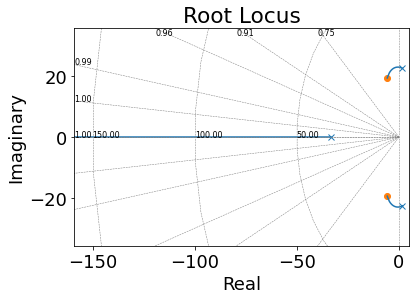

In [34]:
from numpy import linalg as LA
L=1 # Value L=1

#A B C D Matrices that I obtained from 3 b.
A = np.array([[0,1,0],[-392.4,0,11.4],[0,0.137,-30]]) 
B = np.array([[0],[0],[1/L]])
C = np.array([[1,1,1]])
D = np.array([[0]])

#Range of kp
kp=np.arange(-10000,500,50)

#create a for loop to feed all kp values and multiply by k to feed A.
for i in range(0,len (kp)):
 new_kp=np.array([kp[i],0,0])
 new_B=np.multiply(B,new_kp)
 P_feedback = A-new_B
 ss = ctrl.StateSpace(P_feedback,B,C,D)

## plot a root locus
ctrl.rlocus(ss)
plt.show()